<center><h1>Data Science Capstone Project</h1></center>

<h3>Table of Content</h3>
<ul>
    <li><a href='#a'>Problem description and Data Understanding</a></li>
    <li><a href='#b'>Data Preparation</a></li>
    <li><a href='#c'>Exploratory Data Analysis</a></li>
    <li><a href='#d'>Predictive Modeling & Evaluation</a></li>
    <li><a href='#e'>Conclusion</a></li>
</ul>

<h2 id='a'>Problem description and Data Understanding </h2>


<h3> Collisions</h3>
<p>A collision is the event in which two or more bodies exert forces on each other in about a relatively short time. Although the most common use of the word collision refers to incidents in which two or more objects collide with great force, the scientific use of the term implies nothing about the magnitude of the force.</p><br>
The topic is:
 <h3>Trafic Collisions - All years</h3><br>
 A traffic collision, also called a motor vehicle collision, car accident, or car crash, occurs when a vehicle collides with another vehicle, pedestrian, animal, road debris, or other stationary obstruction, such as a tree, pole or building. Traffic collisions often result in injury, disability, death, and property damage as well as financial costs to both society and the individuals involved.
<p>All collisions provided by SPD and recorded by Traffic Records. </p>



In [3]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

<h1> Data Understanding</h1>

In [4]:
#read the data
data = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
print("Data read into dataframe!") 

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data read into dataframe!


In [5]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
#shape of the data
data.shape

(194673, 38)

In [7]:
#info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

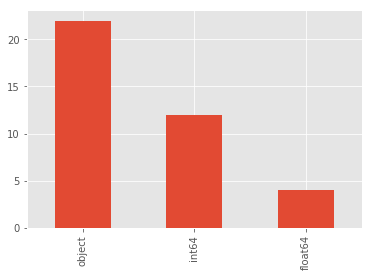

In [8]:
data.dtypes.value_counts().plot(kind='bar')

In [9]:
Null_values = data.isnull().sum()
Null_values[0:38]

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

I know to handle the missing values, the best case remove the which columns are many missing values. 
<ul><li>INTKEY</li>
    <li>EXCEPTRSNCODE</li>
    <li>EXCEPTRSNDESC</li>
    <li>INATTENTIONIND</li>
    <li>PEDROWNOTGRNT</li>
    <li>SDOTCOLNUM</li>
    <li>SPEEDING</li></ul>

<h2 id='b'>Data Preparation </h12>

<h3>Datatypes of the data</h3>

drop the unwanted columns like object data types, null values, same value of columns and unrelated columns.<br>
**eg:**<br>
INCKEY and COLDETKEY both are same information. INCKEY is a unique key for the incident. COLDETKEY is secondary key for the incident 

In [10]:
df= data.drop(['X','Y','SEVERITYCODE.1','INTKEY','COLDETKEY','COLLISIONTYPE','LIGHTCOND','REPORTNO','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INCDATE','INCDTTM','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'],axis=1)

In [11]:
df.head()

,SEVERITYCODE,OBJECTID,INCKEY,STATUS,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,ST_COLCODE
0,2,1,1307,Matched,Intersection,2,0,0,2,Overcast,Wet,10
1,1,2,52200,Matched,Block,2,0,0,2,Raining,Wet,11
2,1,3,26700,Matched,Block,4,0,0,3,Overcast,Dry,32
3,1,4,1144,Matched,Block,3,0,0,3,Clear,Dry,23
4,2,5,17700,Matched,Intersection,2,0,0,2,Raining,Wet,10


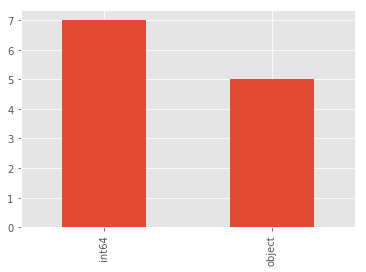

In [12]:
df.dtypes.value_counts().plot(kind='bar')

<h3>Missing Values of data</h3>

In [13]:
Null_values = df.isnull().sum()
Null_values[0:11]

SEVERITYCODE       0
OBJECTID           0
INCKEY             0
STATUS             0
ADDRTYPE        1926
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
WEATHER         5081
ROADCOND        5012
dtype: int64

In [14]:
df['ST_COLCODE'] = df['ST_COLCODE'].fillna(0)

In [15]:
df['ADDRTYPE'] = df['ADDRTYPE'].fillna(0)
df['ADDRTYPE'] = df['ADDRTYPE'].replace(0,'others')

In [16]:
df['WEATHER'] = df['WEATHER'].fillna(0)
df['WEATHER'] = df['WEATHER'].replace(0,'others')

In [17]:
df['ROADCOND'] = df['ROADCOND'].fillna(0)
df['ROADCOND'] = df['ROADCOND'].replace(0,'others')

In [18]:
Null_values = df.isnull().sum()
Null_values[0:11]

SEVERITYCODE    0
OBJECTID        0
INCKEY          0
STATUS          0
ADDRTYPE        0
PERSONCOUNT     0
PEDCOUNT        0
PEDCYLCOUNT     0
VEHCOUNT        0
WEATHER         0
ROADCOND        0
dtype: int64

<h3>Encoding the data</h3>

In [19]:
#addrtype
from sklearn import preprocessing
addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','others'])
df['ADDRTYPE'] = addrtype.transform(df['ADDRTYPE'])

In [20]:
list(addrtype.classes_)

['Alley', 'Block', 'Intersection', 'others']

<ul>
<li>Intersection - 2</li>
<li>Block - 1</li>
<li>Alley - 0</li>
<li>others - 3</li>
    </ul>

In [21]:
#status
from sklearn import preprocessing
status = preprocessing.LabelEncoder()
status.fit(['Unmatched','Matched'])
df['STATUS'] = status.transform(df['STATUS'])

In [22]:
list(status.classes_)

['Matched', 'Unmatched']

<ul>
<li>Matched - 0</li>
<li>Unmatched - 1</li>

</ul>

In [23]:
#weather
from sklearn import preprocessing
weathercond = preprocessing.LabelEncoder()
weathercond.fit(['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy','others'])
df['WEATHER'] = weathercond.transform(df['WEATHER'])

In [24]:
list(weathercond.classes_)

['Blowing Sand/Dirt',
 'Clear',
 'Fog/Smog/Smoke',
 'Other',
 'Overcast',
 'Partly Cloudy',
 'Raining',
 'Severe Crosswind',
 'Sleet/Hail/Freezing Rain',
 'Snowing',
 'Unknown',
 'others']

In [25]:
#Road
from sklearn import preprocessing
roadcond = preprocessing.LabelEncoder()
roadcond.fit(['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil','others'])
df['ROADCOND'] = roadcond.transform(df['ROADCOND'])

In [26]:
list(roadcond.classes_)

['Dry',
 'Ice',
 'Oil',
 'Other',
 'Sand/Mud/Dirt',
 'Snow/Slush',
 'Standing Water',
 'Unknown',
 'Wet',
 'others']

In [27]:
df.head()

,SEVERITYCODE,OBJECTID,INCKEY,STATUS,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,ST_COLCODE
0,2,1,1307,0,2,2,0,0,2,4,8,10
1,1,2,52200,0,1,2,0,0,2,6,8,11
2,1,3,26700,0,1,4,0,0,3,4,0,32
3,1,4,1144,0,1,3,0,0,3,1,0,23
4,2,5,17700,0,2,2,0,0,2,6,8,10


<h2 id='c'>Exploratory Data Analysis</h2>

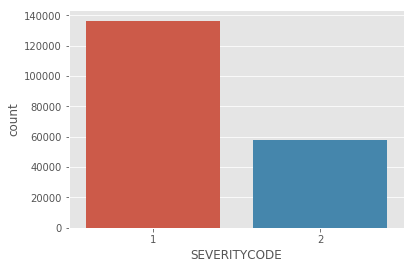

In [28]:
sns.countplot(df['SEVERITYCODE'], data=df)

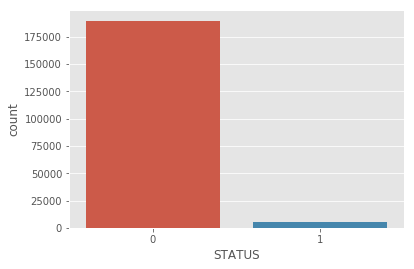

In [29]:
sns.countplot(df['STATUS'], data=df)

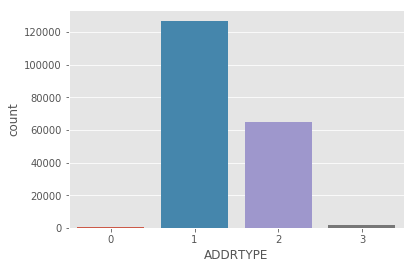

In [30]:
sns.countplot(df['ADDRTYPE'], data=df)

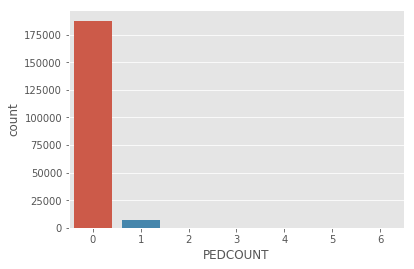

In [32]:
sns.countplot(df['PEDCOUNT'], data=df)

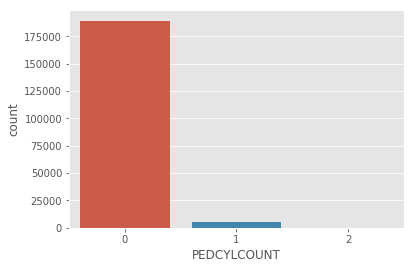

In [33]:
sns.countplot(df['PEDCYLCOUNT'], data=df)

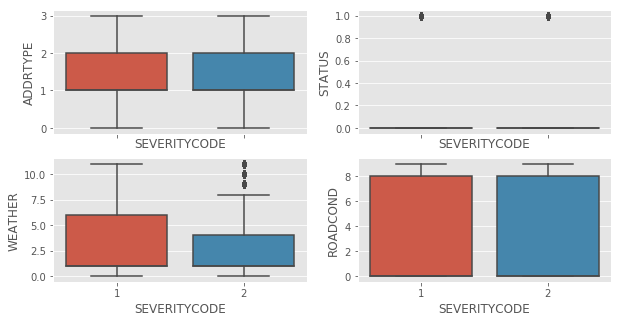

In [97]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))
sns.boxplot(ax=axes[0, 0], data=df, x='SEVERITYCODE', y='ADDRTYPE')
axes[0].set_title('Address Type')
sns.boxplot(ax=axes[0, 1], data=df, x='SEVERITYCODE', y='STATUS')
axes[1].set_title('Status')
sns.boxplot(ax=axes[1, 0], data=df, x='SEVERITYCODE', y='WEATHER')
axes[2].set_title('Weathe')
sns.boxplot(ax=axes[1, 1], data=df, x='SEVERITYCODE', y='ROADCOND')
axes[3].set_title(bulbasaur.name)

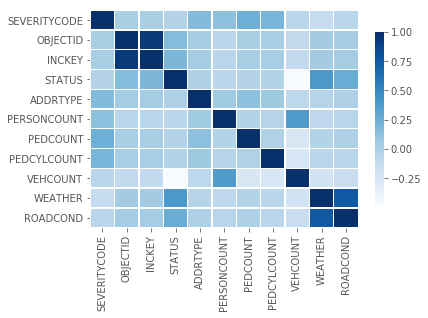

In [35]:
sns.heatmap(df.corr(),cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8})

<h2 id='d'>Predictive Modeling & Evaluation</h2>

In [36]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, jaccard_similarity_score, confusion_matrix, classification_report

In [54]:
#split the data

X = df[['OBJECTID','INCKEY','STATUS','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
y = df['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [55]:
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(155738, 8)
(155738,)

Test set size
(38935, 8)
(38935,)


<h3>K Nearest Neighbors</h3>

In [56]:
k=17
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [57]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
print('Score:',accuracy_score(knn_pred, y_test))
print('F1-Score:',f1_score(knn_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(knn_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred, labels=[1,0]))
print('')
print('Classification Report:')
print (classification_report(y_test, knn_pred))

Score: 0.6868113522537562
F1-Score: 0.8105109398309297
Jaccard Score: 0.6868113522537562

Confusion Martix:
[[26079     0]
 [    0     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.95      0.81     27359
           2       0.34      0.06      0.10     11576

   micro avg       0.69      0.69      0.69     38935
   macro avg       0.52      0.51      0.45     38935
weighted avg       0.60      0.69      0.60     38935



In [59]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    pred=knn.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, pred)

    
    std_acc[n-1]=np.std(pred==y_test)/np.sqrt(pred.shape[0])

mean_acc

array([0.5922178 , 0.66991139, 0.62175421, 0.67170926, 0.6409914 ,
       0.67766791, 0.6532169 , 0.68121228, 0.66495441, 0.68645178,
       0.67381533, 0.68789007, 0.6791062 , 0.69068961, 0.68344677,
       0.69377167, 0.68681135, 0.69590343, 0.69099782])

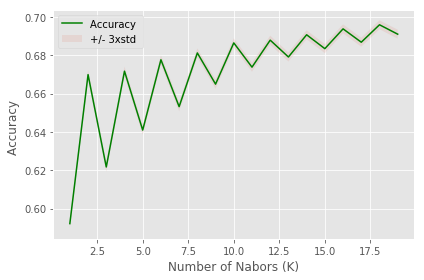

In [60]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

<h3>Decision Tree</h3>

In [61]:
tree = DecisionTreeClassifier(criterion="gini", max_depth = 4).fit(X_train, y_train)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
tree_pred = tree.predict(X_test)
tree_pred

array([1, 2, 1, ..., 1, 1, 1])

In [63]:
print('Score:',accuracy_score(tree_pred, y_test))
print('F1-Score:',f1_score(tree_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(tree_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, tree_pred, labels=[1,0]))
print('')
print('Classification Report:')
print (classification_report(y_test, tree_pred))

Score: 0.7509181969949916
F1-Score: 0.8481936009016342
Jaccard Score: 0.7509181969949916

Confusion Martix:
[[27093     0]
 [    0     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27359
           2       0.89      0.19      0.31     11576

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.82      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935



<h3>Logistic Regression</h3>

In [64]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
lr_pred = lr.predict(X_test)
lr_pred

array([1, 1, 1, ..., 1, 1, 1])

In [66]:
print('Score:',accuracy_score(lr_pred, y_test))
print('F1-Score:',f1_score(lr_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(lr_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, lr_pred, labels=[1,0]))
print('')
print('Classification Report:')
print (classification_report(y_test, lr_pred))

Score: 0.6984461281623218
F1-Score: 0.8216818796227389
Jaccard Score: 0.6984461281623218

Confusion Martix:
[[27051     0]
 [    0     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.99      0.82     27359
           2       0.32      0.01      0.02     11576

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.51      0.50      0.42     38935
weighted avg       0.59      0.70      0.58     38935



<h3>Navie Bayes</h3>

In [67]:
nb = GaussianNB(priors=None, var_smoothing=1e-09).fit(X_train,y_train)
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
nb_pred = nb.predict(X_test)
nb_pred

array([1, 1, 1, ..., 1, 1, 1])

In [69]:
print('Score:',accuracy_score(nb_pred, y_test))
print('F1-Score:',f1_score(nb_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(nb_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred, labels=[1,0]))
print('')
print('Classification Report:')
print (classification_report(y_test, nb_pred))

Score: 0.7022987029664826
F1-Score: 0.8250758341759353
Jaccard Score: 0.7022987029664826

Confusion Martix:
[[26079     0]
 [    0     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27359
           2       0.26      0.00      0.00     11576

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.48      0.50      0.41     38935
weighted avg       0.57      0.70      0.58     38935



<h3>Random Forest</h3>

In [70]:
rf = RandomForestClassifier(n_estimators=20).fit(X_train,y_train)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
rf_pred = rf.predict(X_test)
rf_pred

array([1, 1, 1, ..., 2, 1, 1])

In [72]:
print('Score:',accuracy_score(rf_pred, y_test))
print('F1-Score:',f1_score(rf_pred, y_test))
print('Jaccard Score:',jaccard_similarity_score(rf_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred, labels=[1,0]))
print('')
print('Classification Report:')
print (classification_report(y_test, rf_pred))

Score: 0.711878772312829
F1-Score: 0.8068925153205261
Jaccard Score: 0.711878772312829

Confusion Martix:
[[26079     0]
 [    0     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.86      0.81     27359
           2       0.52      0.37      0.43     11576

   micro avg       0.71      0.71      0.71     38935
   macro avg       0.64      0.61      0.62     38935
weighted avg       0.69      0.71      0.70     38935



Finally, get a good result for all classification algorithms. the best classifier of this problem is **k nearest neighbour**. It's get  best score and more true positive values.

<h3>Result & Discussion </h3>

Our analysis shows that although there is a collisions of all years. I find the what happend after collision based on that corresponds to the severity of the collision. It provide <br>
• 3 — fatality<br>
• 2b — serious injury<br> 
• 2 — injury <br>
• 1 — prop damage<br> 
• 0 — unknown 

Thats major important matter to the collisions. so we tried to predict what type of injury based on weather condition, road condition, etc... 

<h2 id='e'>Conclusion</h2>

A traffic collision, also called a motor vehicle collision, car accident, or car crash, occurs when a vehicle collides with another vehicle, pedestrian, animal, road debris, or other stationary obstruction, such as a tree, pole or building. Traffic collisions often result in injury, disability, death, and property damage as well as financial costs to both society and the individuals involved.

Purpose of this project was to identify the **type of collisions or type of injury** to the during of collision. The major important of predicting is Weather condition, Road condition, Address of collision, How many peoples are involved, How many vehicles are present and Which type of vehicles. That are hepls to predicte to what type of injury or disability in collision.

Final discussion, we get optimal solution to the Collisions of all year in further analysis.